## Implementation of Data Preprocessing, Visualizations, ADASYN, Baseline and Hypertuned K-NN Model

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
#Read files
stress_data=pd.read_csv("combined_data.csv")

In [3]:
stress_data.head()

,Unnamed: 0,id,time,x,y,z,hr,bvp,eda,temp,label
0,0,0,0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,1,0,1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,2,0,2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,3,0,3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,4,0,4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


Since id and time columns are relevant to generate model we will be dropping them

In [4]:
stress_data.drop(columns=['Unnamed: 0','id','time'],inplace=True)

In [5]:
## Renaming the Accelerometer data columns
stress_data.columns=('ACC_X','ACC_Y','ACC_Z','hr','bvp','eda','temp','stress_label')

In [6]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0


### Checking Null Value

In [7]:
stress_data.isnull().sum()

ACC_X           0
ACC_Y           0
ACC_Z           0
hr              0
bvp             0
eda             0
temp            0
stress_label    0
dtype: int64

### Checking Duplicate Value

In [129]:
import pandas as pd

def check_duplicates(file_path):
    df = pd.read_csv(file_path)  
    # Check for duplicates
    duplicates = df[df.duplicated()]
    
    if duplicates.empty:
        print("No duplicates found.")
    else:
        print("Duplicates found:")
        print(duplicates)

file_path = 'combined_data.csv'
check_duplicates(file_path)


No duplicates found.


### Checking for data statistics

In [8]:
stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137215 entries, 0 to 137214
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ACC_X         137215 non-null  float64
 1   ACC_Y         137215 non-null  float64
 2   ACC_Z         137215 non-null  float64
 3   hr            137215 non-null  float64
 4   bvp           137215 non-null  float64
 5   eda           137215 non-null  float64
 6   temp          137215 non-null  float64
 7   stress_label  137215 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 8.4 MB


### Feature engineering

In [9]:
stress_data['acc_mag']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2+stress_data.ACC_Z**2)
stress_data['acc_xy_sqrt']=np.sqrt(stress_data.ACC_X**2+stress_data.ACC_Y**2)

In [10]:
stress_data.head()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
0,2.59375,4.06250,61.28125,118.00,15.760000,0.566449,34.79,0,61.470506,4.819901
1,-4.46875,6.50000,63.15625,113.50,-41.960313,0.654746,34.79,0,63.646930,7.887948
2,-4.12500,5.28125,63.65625,93.00,26.097031,0.664677,34.79,0,64.008010,6.701285
3,-7.62500,5.46875,63.15625,93.25,4.685781,0.677812,34.68,0,63.849509,9.383382
4,-14.59375,5.87500,62.28125,86.40,-7.058125,0.685500,34.66,0,64.237429,15.731915


In [11]:
stress_data.describe()

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,stress_label,acc_mag,acc_xy_sqrt
count,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000,137215.000000
mean,-25.527088,-1.289276,37.763983,81.671589,0.027899,1.226292,31.640413,0.351747,64.051395,41.916917
std,31.212371,20.579846,25.093879,13.269286,26.723458,1.946584,2.402277,0.477517,2.064449,17.146448
min,-71.250000,-74.781250,-63.500000,48.000000,-456.254687,0.000000,21.410000,0.000000,9.638130,0.227503
25%,-49.781250,-11.906250,23.750000,72.170000,-4.357813,0.245657,30.010000,0.000000,63.710305,28.315449
50%,-31.000000,-2.531250,47.093750,79.530000,0.058594,0.482980,31.610000,0.000000,64.298217,42.654693
75%,-12.031250,8.000000,57.125000,89.130000,4.699531,1.217613,33.490000,1.000000,64.870243,58.338348
max,70.531250,100.250000,67.656250,146.780000,563.400000,19.685075,38.270000,1.000000,105.402030,103.282498


## Plots for EDA

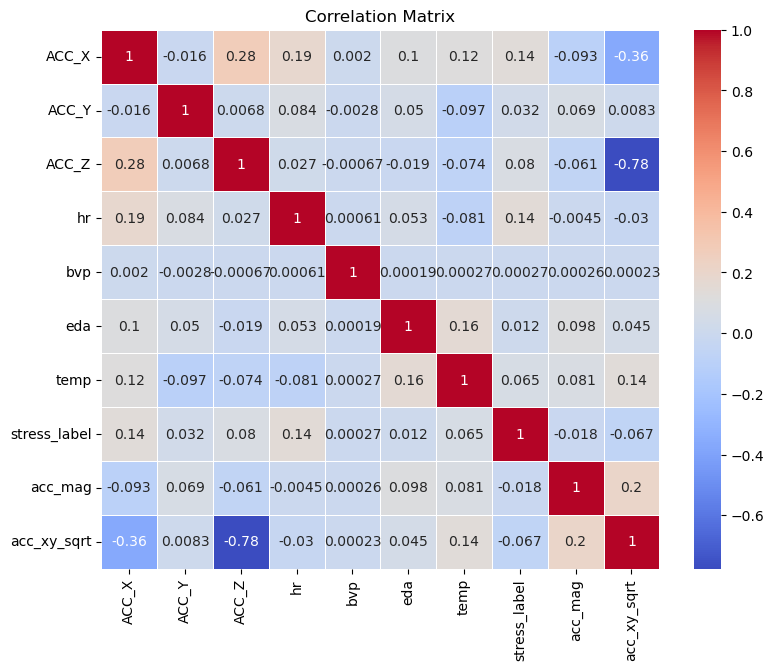

In [111]:

corr_matrix = stress_data[['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','stress_label','acc_mag','acc_xy_sqrt']].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

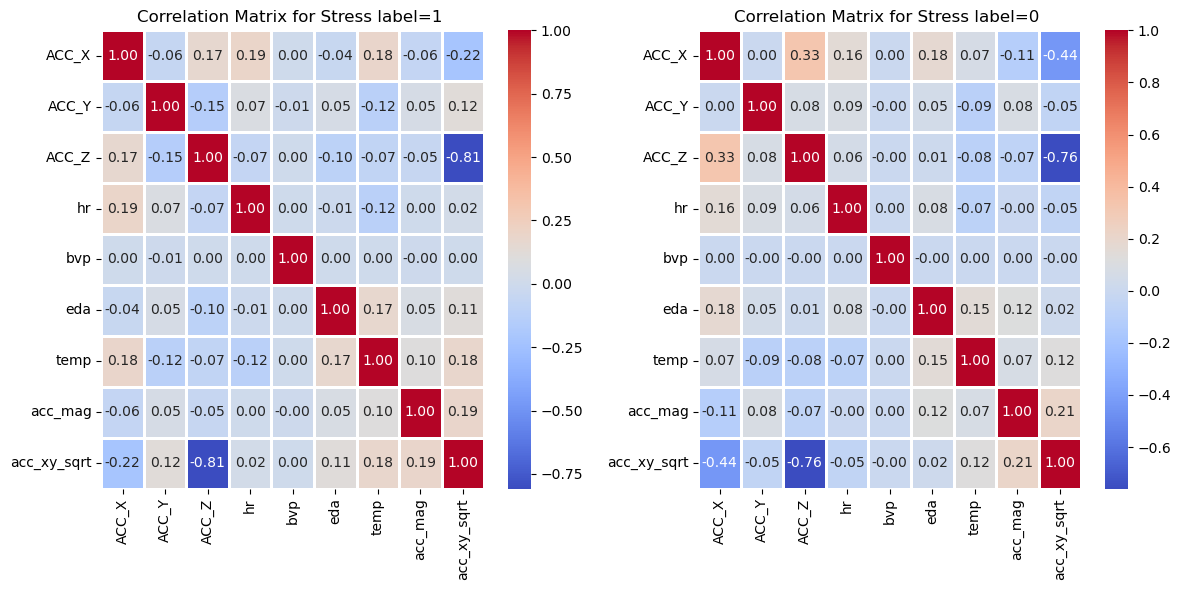

In [13]:
conditions = [
    {'stress_label': 1,  'title': 'Stress label=1 '},
    {'stress_label': 0,  'title': 'Stress label=0 '}
]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, condition in enumerate(conditions):
    corr_matrix = stress_data[
        (stress_data['stress_label'] == condition['stress_label']) 
    ][['ACC_X','ACC_Y', 'ACC_Z', 'hr','bvp','eda','temp','acc_mag','acc_xy_sqrt']].corr()

    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        xticklabels=True,
        yticklabels=True,
        fmt=".2f",
        linewidths=2,
        ax=ax[i]
    )
    
    ax[i].set_title(f'Correlation Matrix for {condition["title"]}')

plt.tight_layout()

plt.show()

### Checking distribution for each features

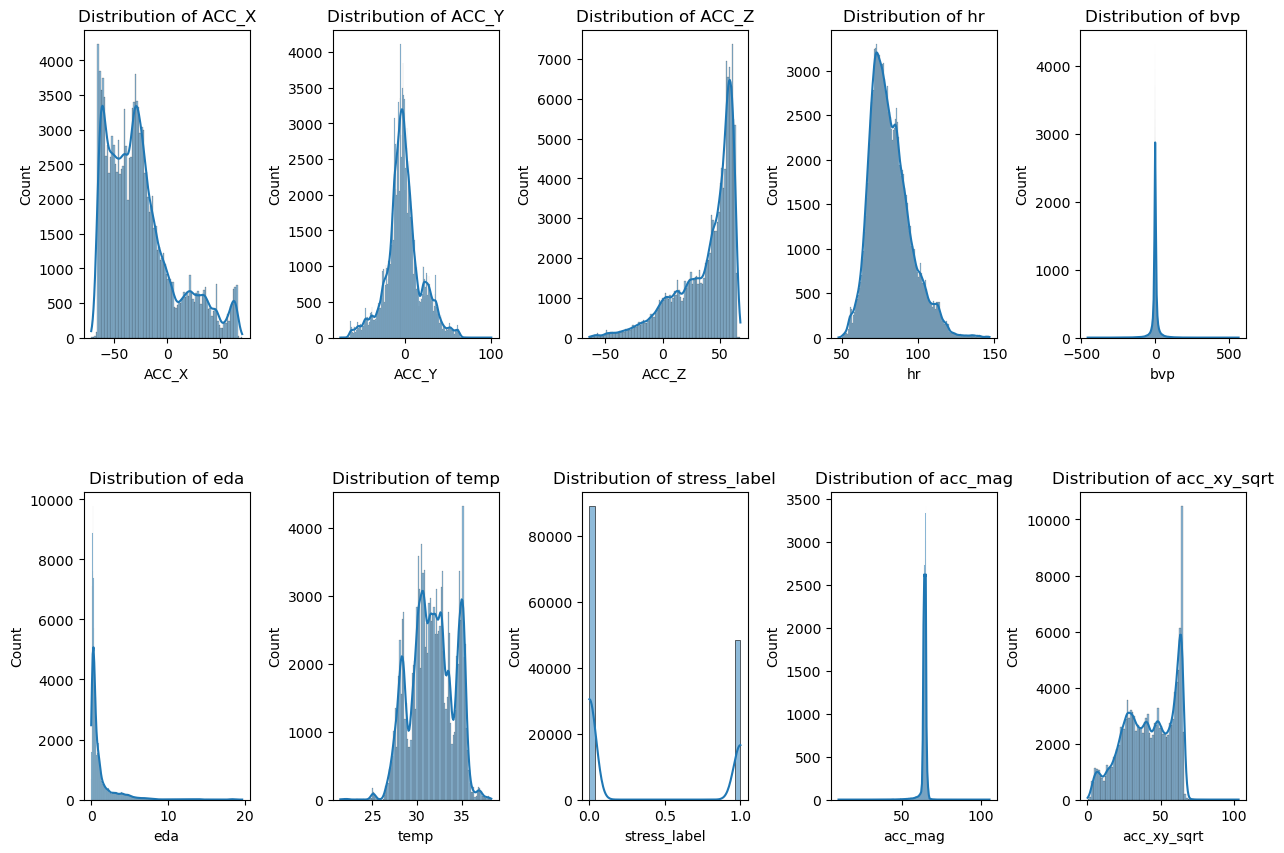

In [14]:
def plotPerColumnDistribution(dataframe, num_cols_per_row=5, figsize=(15, 10), num_columns=10):
    columns_to_plot = dataframe.columns[:num_columns]
    num_cols = len(columns_to_plot)
    num_rows = (num_cols + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, column in enumerate(columns_to_plot):
        row_idx = i // num_cols_per_row
        col_idx = i % num_cols_per_row
        
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        
        sns.histplot(dataframe[column], ax=ax, kde=True)
        ax.set_title(f'Distribution of {column}')
        
    for i in range(num_cols, num_cols_per_row * num_rows):
        fig.delaxes(axes[i])
    
    plt.show()

# plot
plotPerColumnDistribution(stress_data, num_cols_per_row=5, num_columns=10)


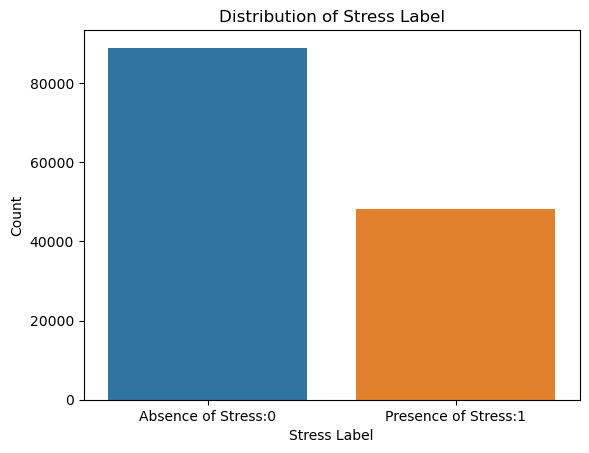

In [15]:

sns.countplot(x='stress_label', data=stress_data)
plt.title('Distribution of Stress Label')
plt.xlabel('Stress Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absence of Stress:0', 'Presence of Stress:1']) 
plt.show()

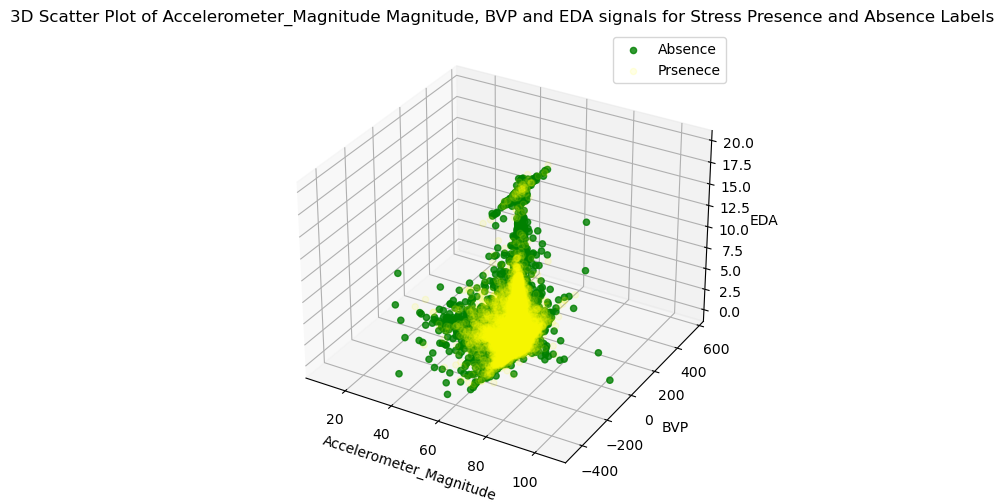

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for both temperature sets
fig = plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
ax = fig.add_subplot(111, projection='3d')

sc1 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==0)],stress_data['bvp'][(stress_data['stress_label']==0)],stress_data['eda'][(stress_data['stress_label']==0)],c='green', label='Absence',alpha=0.8)

sc2 = ax.scatter(stress_data['acc_mag'][(stress_data['stress_label']==1)],stress_data['bvp'][(stress_data['stress_label']==1)],stress_data['eda'][(stress_data['stress_label']==1)], c='yellow',label='Prsenece', alpha=0.1)
plt.title('3D Scatter Plot of Accelerometer_Magnitude Magnitude, BVP and EDA signals for Stress Presence and Absence Labels')
ax.set_xlabel('Accelerometer_Magnitude')
ax.set_ylabel('BVP')
ax.set_zlabel('EDA')
#fig.colorbar(sc1, ax=ax, label='Stress Labels')
plt.legend()
plt.show()

In [54]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Handling class imbalance : using Oversampling technique ADASYN

Reference : 
- https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa

- https://medium.com/quantyca/oversampling-and-undersampling-adasyn-vs-enn-60828a58db39

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,accuracy_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
feature=stress_data.drop(columns=['stress_label'])

In [19]:
target=stress_data.stress_label

In [20]:
pip install fast_ml --quiet

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Split the data into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(feature, target, train_size=0.7, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
# Print the shapes of each dataset
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (96050, 9) (96050,)
Validation set shape: (20582, 9) (20582,)
Testing set shape: (20583, 9) (20583,)


In [23]:
y_train.head(10)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
99906     1
54763     1
124402    1
80734     1
Name: stress_label, dtype: int64

In [24]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### We will perform data standardization

In [25]:
# define the pipeline
steps = [
    ('scalar', StandardScaler()),
    ('model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [26]:
RandomForest_pipe = Pipeline(steps)
RandomForest_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])

In [27]:
y_train.head(6)

76161     0
97056     0
46254     0
108076    0
106643    0
30195     0
Name: stress_label, dtype: int64

### Building base RandomForest Classification model before oversampling the target variable

In [28]:

#model = RandomForestClassifier(min_samples_leaf=5 ,random_state=123)
#model.fit(train, y_train)
print('Validation set Recall: ', 
      recall_score(y_valid, RandomForest_pipe.predict(X_valid)))

Validation set Recall:  0.9066794942275975


### We will perform ADASYN to rebalance dataset

In [29]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train)

print('Resampled dataset after ADASYN shape %s' % Counter(y_ada))

Resampled dataset after ADASYN shape Counter({1: 63884, 0: 62273})


#### After resampling using ADASYN , target variable is resampled:
- Stress_label : 1 has 63716 data
- Stress_label : 0 has 62012 data

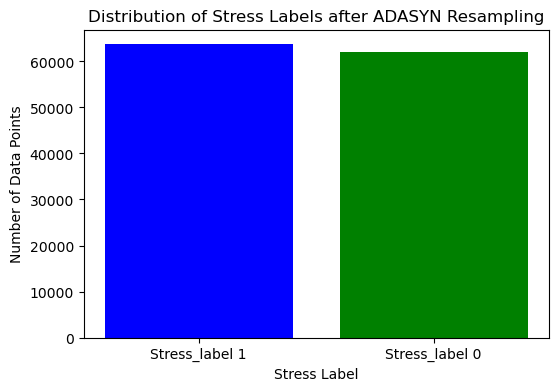

In [30]:
import matplotlib.pyplot as plt

# Define the number of data points for each class after resampling
class_counts = {'Stress_label 1': 63716, 'Stress_label 0': 62012}

# Plotting the bar graph
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'green'])
plt.xlabel('Stress Label')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Stress Labels after ADASYN Resampling')
plt.show()


In [31]:
X_ada.head(5)

,ACC_X,ACC_Y,ACC_Z,hr,bvp,eda,temp,acc_mag,acc_xy_sqrt
0,-32.21875,-26.84375,49.40625,68.60,4.952969,0.071135,32.49,64.804416,41.936080
1,-26.53125,4.15625,57.46875,75.22,2.952969,0.267782,32.65,63.433736,26.854825
2,21.81250,-59.00000,-10.53125,65.67,0.760000,0.138962,31.29,63.778463,62.902982
3,-1.00000,-6.62500,63.12500,81.18,4.299688,0.265502,35.27,63.479573,6.700047
4,-28.78125,15.68750,55.87500,85.58,-0.093906,0.342115,35.34,64.780195,32.778926


Text(0.5, 0.98, 'Stress Label data with ADASYN oversampling')

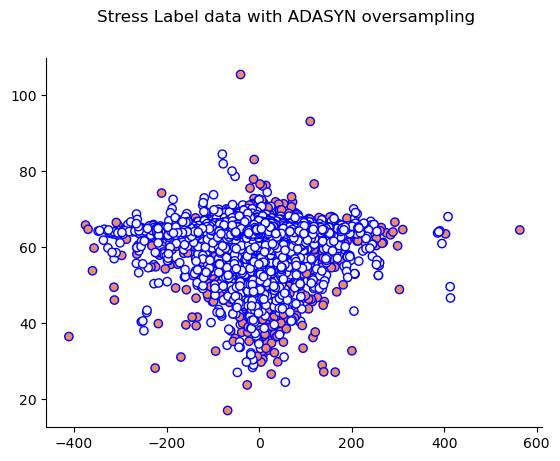

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#ax = fig.add_subplot()
kwarg_params = {'linewidth': 1, 'edgecolor': 'blue'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_ada]
plt.scatter(X_ada.bvp,X_ada.acc_mag, c=colors, **kwarg_params)

ax.set_xlabel('BVP')
ax.set_ylabel('EDA')
sns.despine()
plt.suptitle("Stress Label data with ADASYN oversampling")

###  We will perform Random Forest Classification again on ADASYN resampled dataset

In [65]:
# define the pipeline

steps = [
    ('scalar', StandardScaler()),
    ('ada_model', RandomForestClassifier(min_samples_leaf=5 ,random_state=123))
]

In [66]:
ada_pipe = Pipeline(steps)


In [68]:
#ada_model = RandomForestClassifier(min_samples_leaf=5,
#                                   random_state=123)
ada_pipe.fit(X_ada, y_ada)
y_pred=ada_pipe.predict(X_valid)
print('Validation set Recall: ', 
      recall_score(y_valid, y_pred))

Validation set Recall:  0.9605552501374381


In [69]:
## For printing standardized data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler = scaler.fit(X_ada)
# standardization the dataset and print the first 5 rows
#normalized = scaler.transform(X_ada)
#for i in range(6):
# print(normalized[i])

In [70]:
print('Validation set Accuracy: ', 
      accuracy_score(y_valid, y_pred))

Validation set Accuracy:  0.943348556991546


In [71]:
##Testing the model on y_test
ypred_testdata=ada_pipe.predict(X_test)

In [72]:
print('Validation set Accuracy: ', accuracy_score(y_test, ypred_testdata))

Validation set Accuracy:  0.9448574065976777


In [73]:
ada_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scalar', StandardScaler()),
                ('ada_model',
                 RandomForestClassifier(min_samples_leaf=5, random_state=123))])>

## k-nearest neighbor K-NN Implementation

## Baseline Model for K-NN

Training Time: 0.1943504810333252 seconds
Validation Set Metrics:
Accuracy: 0.9099698765911962
Precision: 0.8375451263537906
Recall: 0.9246838922484881
F1-score: 0.878960088836632
Brier score loss: 0.09003012340880381
Log loss: 3.245014562726367
ROC AUC (Validation Set): 0.9510394707996913

Test Set Metrics:
Accuracy: 0.908419569547685
Precision: 0.8364279398762158
Recall: 0.918191902384914
F1-score: 0.8754048516094917
Brier score loss: 0.09158043045231502
Log loss: 3.300893292449392
ROC AUC (Test Set): 0.9519755557023952


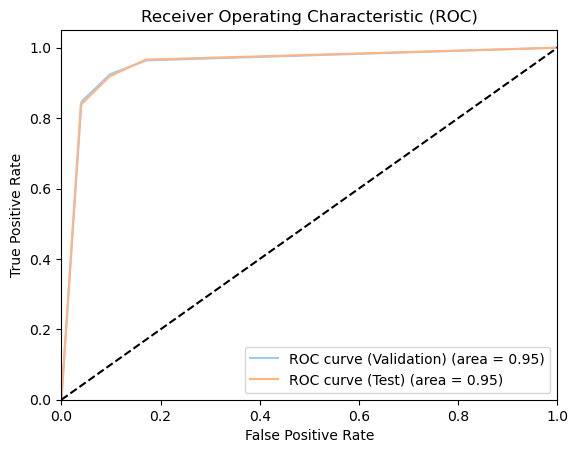

In [120]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, log_loss, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

# Define the pipeline with ADASYN sampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='euclidean'))  # KNN classifier
])

start_time = time.time()
pipeline.fit(X_ada, y_ada)
end_time = time.time()

# Predictions on validation set
y_valid_pred_knn = pipeline.predict(X_valid)
y_valid_prob_knn = pipeline.predict_proba(X_valid)[:, 1]

# Performance Evaluation metrics for validation set
valid_accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
precision_valid = precision_score(y_valid, y_valid_pred_knn)
recall_valid = recall_score(y_valid, y_valid_pred_knn)
f1_valid = f1_score(y_valid, y_valid_pred_knn)
brier_loss_valid = brier_score_loss(y_valid, y_valid_pred_knn)
logloss_valid = log_loss(y_valid, y_valid_pred_knn)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_knn)

# Predictions on the test set
y_test_pred_knn = pipeline.predict(X_test)
y_test_prob_knn = pipeline.predict_proba(X_test)[:, 1]

# Performance Evaluation metrics for testing set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test = precision_score(y_test, y_test_pred_knn)
recall_test = recall_score(y_test, y_test_pred_knn)
f1_test = f1_score(y_test, y_test_pred_knn)
brier_loss_test = brier_score_loss(y_test, y_test_pred_knn)
logloss_test = log_loss(y_test, y_test_pred_knn)
roc_auc_test = roc_auc_score(y_test, y_test_prob_knn)

# Training Execution time
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

# Print evaluation metrics
print("Validation Set Metrics:")
print("Accuracy:", valid_accuracy_knn)
print("Precision:", precision_valid)
print("Recall:", recall_valid)
print("F1-score:", f1_valid)
print("Brier score loss:", brier_loss_valid)
print("Log loss:", logloss_valid)
print("ROC AUC (Validation Set):", roc_auc_valid)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy_knn)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("Brier score loss:", brier_loss_test)
print("Log loss:", logloss_test)
print("ROC AUC (Test Set):", roc_auc_test)

# Draw ROC curve for both the validation and test sets
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob_knn)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_knn)

plt.plot(fpr_valid, tpr_valid, label='ROC curve (Validation) (area = %0.2f)' % roc_auc_valid)
plt.plot(fpr_test, tpr_test, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [121]:
# Classification report for validation and test set

from sklearn.metrics import classification_report

print("Classification Report for Validation Set:")
print(classification_report(y_valid, y_valid_pred_knn))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_knn))

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     13306
           1       0.84      0.92      0.88      7276

    accuracy                           0.91     20582
   macro avg       0.90      0.91      0.90     20582
weighted avg       0.91      0.91      0.91     20582


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     13371
           1       0.84      0.92      0.88      7212

    accuracy                           0.91     20583
   macro avg       0.89      0.91      0.90     20583
weighted avg       0.91      0.91      0.91     20583



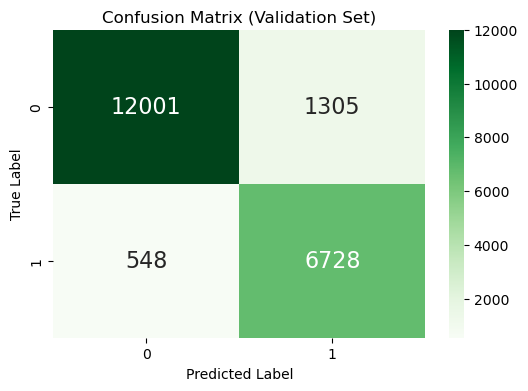

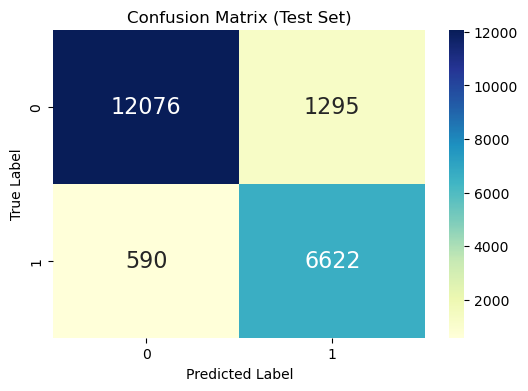

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute and plot confusion matrix for validation set
cm_valid = confusion_matrix(y_valid, y_valid_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Greens", annot_kws={"size": 16})
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Compute and plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"size": 16})
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Distance Metrics - Manhattan, Chebyshev, Minkowski and Cosine Similarity

In [77]:
from sklearn.model_selection import GridSearchCV

# Define the distance metrics
distance_metrics = ['manhattan', 'chebyshev', 'minkowski', 'cosine']

# Initialize lists to store results
validation_metrics = []
test_metrics = []
training_times = []

for metric in distance_metrics:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(metric=metric))
    ])

    start_time = time.time()

    # Training the model
    pipeline.fit(X_ada, y_ada)
    
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

    # Predictions on the validation set
    y_valid_pred_knn = pipeline.predict(X_valid)

    # Predictions on the test set
    y_test_pred_knn = pipeline.predict(X_test)
    
    # Compute evaluation metrics for validation set
    valid_accuracy = accuracy_score(y_valid, y_valid_pred_knn)
    precision = precision_score(y_valid, y_valid_pred_knn)
    recall = recall_score(y_valid, y_valid_pred_knn)
    f1 = f1_score(y_valid, y_valid_pred_knn)
    brier_loss = brier_score_loss(y_valid, y_valid_pred_knn)
    logloss = log_loss(y_valid, y_valid_pred_knn)
    roc_auc = roc_auc_score(y_valid, pipeline.predict_proba(X_valid)[:, 1])
    
    validation_metrics.append({
        'Accuracy': valid_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Brier score loss': brier_loss,
        'Log loss': logloss,
        'ROC AUC': roc_auc
    })

    # Compute evaluation metrics for test set
    test_accuracy = accuracy_score(y_test, y_test_pred_knn)
    precision = precision_score(y_test, y_test_pred_knn)
    recall = recall_score(y_test, y_test_pred_knn)
    f1 = f1_score(y_test, y_test_pred_knn)
    brier_loss = brier_score_loss(y_test, y_test_pred_knn)
    logloss = log_loss(y_test, y_test_pred_knn)
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    
    test_metrics.append({
        'Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Brier score loss': brier_loss,
        'Log loss': logloss,
        'ROC AUC': roc_auc
    })

# Print results for validation set
print("Validation Set Metrics:")
for i, metric in enumerate(distance_metrics):
    print(f"\nDistance Metric: {metric}")
    for key, value in validation_metrics[i].items():
        print(f"{key}: {value}")

# Print results for test set
print("\nTest Set Metrics:")
for i, metric in enumerate(distance_metrics):
    print(f"\nDistance Metric: {metric}")
    for key, value in test_metrics[i].items():
        print(f"{key}: {value}")

# Print training times
print("\nTraining Times:")
for i, metric in enumerate(distance_metrics):
    print(f"\nDistance Metric: {metric}")
    print(f"Training Time: {training_times[i]} seconds")


Validation Set Metrics:

Distance Metric: manhattan
Accuracy: 0.9196385190943543
Precision: 0.8543872919818457
Recall: 0.9314183617372183
F1-score: 0.8912414518674382
Brier score loss: 0.08036148090564571
Log loss: 2.8965213635992497
ROC AUC: 0.9705679852190668

Distance Metric: chebyshev
Accuracy: 0.8805266737926344
Precision: 0.7856041740780269
Recall: 0.910527762506872
F1-score: 0.8434655293144058
Brier score loss: 0.11947332620736566
Log loss: 4.306255159063214
ROC AUC: 0.9497903598198186

Distance Metric: minkowski
Accuracy: 0.9018559906714605
Precision: 0.8204096561814191
Recall: 0.9248213304013194
F1-score: 0.8694921824525133
Brier score loss: 0.0981440093285395
Log loss: 3.5374686544561587
ROC AUC: 0.9619577524662225

Distance Metric: cosine
Accuracy: 0.9016616460985327
Precision: 0.8203220297633569
Recall: 0.9242715777899945
F1-score: 0.8691999483003748
Brier score loss: 0.0983383539014673
Log loss: 3.5444735428808243
ROC AUC: 0.9604504207512151

Test Set Metrics:

Distance Me

## Implementing GridSearchCV for tuning the model

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_ada, y_ada)
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

best_knn_model.fit(X_train, y_train)

# Predictions and accuracy on the validation set
y_valid_pred_knn = best_knn_model.predict(X_valid)
valid_accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
print("Validation Set Accuracy (KNN with Best k):", valid_accuracy_knn)

# Predictions and accuracy on the test set
y_test_pred_knn = best_knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("Test Set Accuracy (KNN with Best k):", test_accuracy_knn)


Best k value: 3
Validation Set Accuracy (KNN with Best k): 0.8561850160334272
Test Set Accuracy (KNN with Best k): 0.8541029004518291


### Finding Best Hyperparameters

In [80]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline with ADASYN sampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier(metric='manhattan')) 
])

# Define the hyperparameters to tune
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11], 
    'knn__weights': ['uniform', 'distance'], 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

start_time = time.time()

# Train the model with GridSearchCV
grid_search.fit(X_ada, y_ada)

end_time = time.time()

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

# Predictions on the validation set
y_valid_pred_knn = best_model.predict(X_valid)
y_valid_prob_knn = best_model.predict_proba(X_valid)[:, 1]

# Calculate evaluation metrics on the validation set
valid_accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
precision_valid = precision_score(y_valid, y_valid_pred_knn)
recall_valid = recall_score(y_valid, y_valid_pred_knn)
f1_valid = f1_score(y_valid, y_valid_pred_knn)
brier_loss_valid = brier_score_loss(y_valid, y_valid_pred_knn)
logloss_valid = log_loss(y_valid, y_valid_pred_knn)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_knn)

# Print evaluation metrics
print("Validation Set Metrics:")
print("Accuracy:", valid_accuracy_knn)
print("Precision:", precision_valid)
print("Recall:", recall_valid)
print("F1-score:", f1_valid)
print("Brier score loss:", brier_loss_valid)
print("Log loss:", logloss_valid)
print("ROC AUC (Validation Set):", roc_auc_valid)

# Get the best k value from the best parameters
best_k = best_params['knn__n_neighbors']

# Training time
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")


Best Hyperparameters: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Validation Set Metrics:
Accuracy: 0.9251287532795647
Precision: 0.8659859604339503
Recall: 0.932517866959868
F1-score: 0.898021308980213
Brier score loss: 0.07487124672043532
Log loss: 2.6986332656024454
ROC AUC (Validation Set): 0.9629387268364137
Training Time: 203.3827817440033 seconds


## Hypertuned K-NN model with k=3 and distance metric = Manhattan

Training Time: 0.18096494674682617 seconds
Validation Set Metrics:
Accuracy: 0.9241084442716937
Precision: 0.8641345908743309
Recall: 0.9318306761957119
F1-score: 0.8967067848168232
Brier score loss: 0.07589155572830629
Log loss: 2.7354089298319404
ROC AUC (Validation Set): 0.962226715398783

Test Set Metrics:
Accuracy: 0.9247437205460817
Precision: 0.8638057304381344
Recall: 0.9321963394342762
F1-score: 0.896698899633211
Brier score loss: 0.07525627945391829
Log loss: 2.7125112519915695
ROC AUC (Test Set): 0.9615048542360345


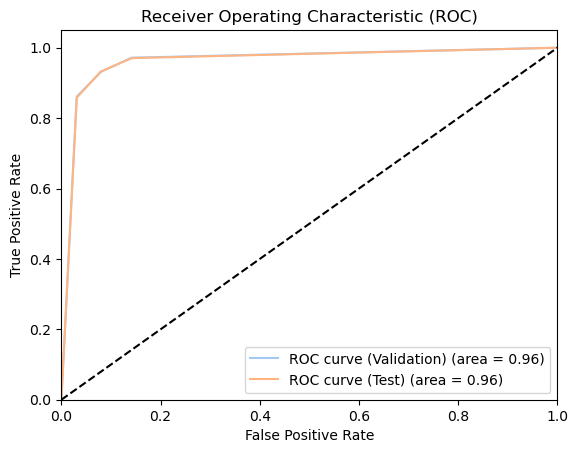

In [124]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, brier_score_loss, log_loss, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

# Define the pipeline with ADASYN sampling
pipeline = Pipeline([
    ('scaler', StandardScaler()),     
    ('knn', KNeighborsClassifier(n_neighbors=3, metric='manhattan'))
])

start_time = time.time()

# Train the model
pipeline.fit(X_ada, y_ada)

end_time = time.time()

# Predictions on the validation set
y_valid_pred_knn = pipeline.predict(X_valid)
y_valid_prob_knn = pipeline.predict_proba(X_valid)[:, 1]

# Performance evaluation metrics on the validation set
valid_accuracy_knn = accuracy_score(y_valid, y_valid_pred_knn)
precision_valid = precision_score(y_valid, y_valid_pred_knn)
recall_valid = recall_score(y_valid, y_valid_pred_knn)
f1_valid = f1_score(y_valid, y_valid_pred_knn)
brier_loss_valid = brier_score_loss(y_valid, y_valid_pred_knn)
logloss_valid = log_loss(y_valid, y_valid_pred_knn)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_knn)

# Predictions on the test set
y_test_pred_knn = pipeline.predict(X_test)
y_test_prob_knn = pipeline.predict_proba(X_test)[:, 1]

# Performance Evaluation metrics on the test set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test = precision_score(y_test, y_test_pred_knn)
recall_test = recall_score(y_test, y_test_pred_knn)
f1_test = f1_score(y_test, y_test_pred_knn)
brier_loss_test = brier_score_loss(y_test, y_test_pred_knn)
logloss_test = log_loss(y_test, y_test_pred_knn)
roc_auc_test = roc_auc_score(y_test, y_test_prob_knn)

# Training time
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

print("Validation Set Metrics:")
print("Accuracy:", valid_accuracy_knn)
print("Precision:", precision_valid)
print("Recall:", recall_valid)
print("F1-score:", f1_valid)
print("Brier score loss:", brier_loss_valid)
print("Log loss:", logloss_valid)
print("ROC AUC (Validation Set):", roc_auc_valid)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy_knn)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)
print("Brier score loss:", brier_loss_test)
print("Log loss:", logloss_test)
print("ROC AUC (Test Set):", roc_auc_test)

# Draw ROC curve for both the validation and test sets
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob_knn)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_knn)

plt.plot(fpr_valid, tpr_valid, label='ROC curve (Validation) (area = %0.2f)' % roc_auc_valid)
plt.plot(fpr_test, tpr_test, label='ROC curve (Test) (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix for Validation and Testing set

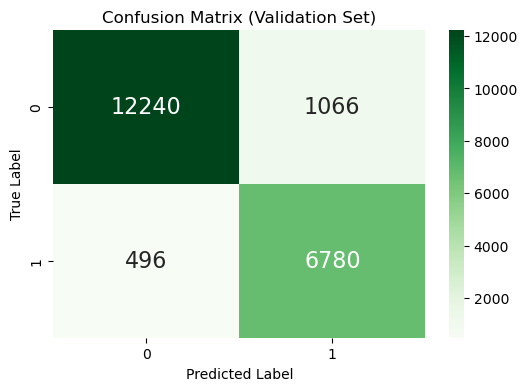

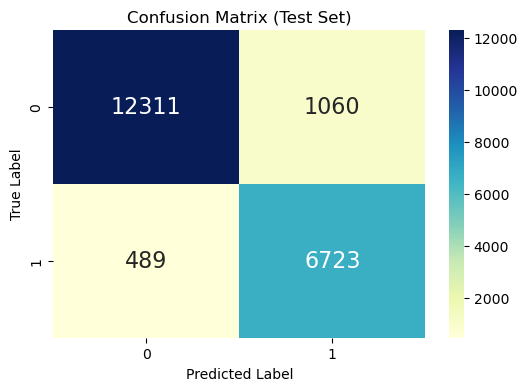

In [126]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute and plot confusion matrix for validation set
cm_valid = confusion_matrix(y_valid, y_valid_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_valid, annot=True, fmt="d", cmap="Greens", annot_kws={"size": 16})
plt.title("Confusion Matrix (Validation Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Compute and plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"size": 16})
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [118]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


### Generating Classification Report for Validation and Testing set

In [125]:
from sklearn.metrics import classification_report

# Generate classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_valid, y_valid_pred_knn))

# Generate classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred_knn))

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13306
           1       0.86      0.93      0.90      7276

    accuracy                           0.92     20582
   macro avg       0.91      0.93      0.92     20582
weighted avg       0.93      0.92      0.92     20582


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     13371
           1       0.86      0.93      0.90      7212

    accuracy                           0.92     20583
   macro avg       0.91      0.93      0.92     20583
weighted avg       0.93      0.92      0.93     20583



### Plotting log loss for all distance metrics

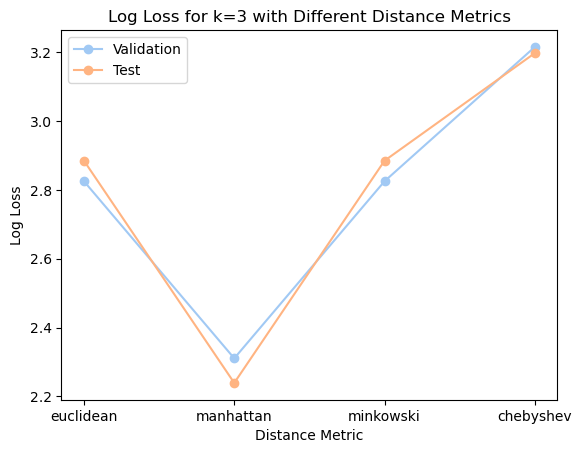

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Define the distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']

# Define lists to store log loss values for each distance metric
valid_log_loss = []
test_log_loss = []

for metric in distance_metrics:
    knn_model = KNeighborsClassifier(n_neighbors=3, metric=metric)
    
    # Train the model
    knn_model.fit(X_ada, y_ada)
    
    # Predict probabilities for validation data
    y_valid_prob = knn_model.predict_proba(X_valid)
    
    # Calculate log loss for validation data
    valid_loss = log_loss(y_valid, y_valid_prob)
    
    # Predict probabilities for test data
    y_test_prob = knn_model.predict_proba(X_test)
    
    # Calculate log loss for test data
    test_loss = log_loss(y_test, y_test_prob)
    
    valid_log_loss.append(valid_loss)
    test_log_loss.append(test_loss)

# Plot log loss values for validation and test data for each distance metric
plt.plot(distance_metrics, valid_log_loss, marker='o', label='Validation')
plt.plot(distance_metrics, test_log_loss, marker='o', label='Test')
plt.xlabel('Distance Metric')
plt.ylabel('Log Loss')
plt.title('Log Loss for k=3 with Different Distance Metrics')
plt.legend()
plt.show()


### Save KNN model as Pickle file  

#### Pickle files are used to save trained model which makes it easier to make prediction on trained model as we don't have to run model again and train it. Through pickle file we can share trained models among groups to facilitate collaboration for model development

In [94]:
import pickle

Pkl_Filename_2 = "Pickle_knn_gridsearchcv_Model.pkl"  

with open(Pkl_Filename_2, 'wb') as file:  
    pickle.dump(y_test_pred_knn, file)

In [95]:
# Load the Model back from file
with open('Pickle_knn_gridsearchcv_Model.pkl', 'rb') as file:  
    Pickled_knngr_Model = pickle.load(file)

Pickled_knngr_Model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Using pickle file to predict and calculate accuracy score

In [99]:
import pickle

# Calculate the Score 
knngr_Score = accuracy_score(y_test, Pickled_knngr_Model) 
# Print the Score
print("Test score: {0:.2f} %".format(100 * knngr_Score))  

Test score: 92.47 %
